## Programming Exercise 2: Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### 1 Logistic Regression

In [2]:
datafile = 'data/ex2data1.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = len(y)
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

#### 1.1 Visualizing the data

In [3]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = X[np.where(y==1)[0]]
neg = X[np.where(y==0)[0]]
#Check to make sure I included all entries

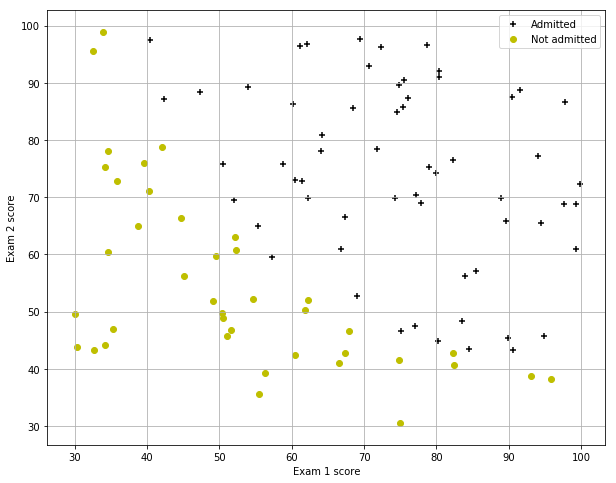

In [4]:
def plotData():
    plt.scatter(pos[:,1],pos[:,2], c='k', marker='+', label='Admitted')
    plt.scatter(neg[:,1],neg[:,2], c='y', marker='o',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid()
    
plotData()

#### 1.2 Implementation

In [5]:
# sigmoid 함수 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

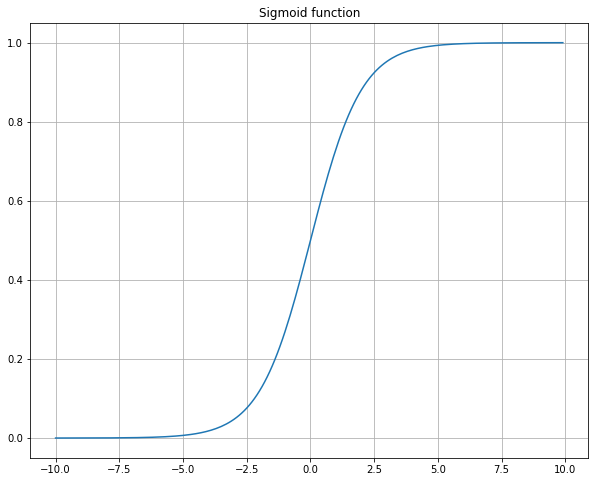

In [6]:
x = np.arange(-10, 10, .1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid function')
plt.grid()
plt.show()

In [7]:
#Hypothesis function and cost function for logistic regression
def h(theta,X): #Logistic hypothesis function
    return sigmoid(np.dot(X,theta))

#Cost function, default lambda (regularization) 0
def computeCost(theta, X, y):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    cost_front = np.dot(y.T, np.log(h(theta, X)))
    cost_back = np.dot((1-y).T, np.log(1 - h(theta, X)))
    cost_total = (-1/m) * np.sum(cost_front + cost_back) 
    return cost_total

In [8]:
#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

0.69314718055994518

In [9]:
iterations = 100000
alpha = 0.001
def descendGradient(X, theta = np.zeros((3,1))):
    # iteration 만큼 반복 예정. iterations : 1500으로 위에 지정되어 있음 
    theta_history = []
    cost_history = []
    for k in range(iterations):
        tmp_theta = theta.copy() # copy 안 해주면 a = b 했을 때, a, b가 같은 값을 가리켜서 a를 변경했을 때 b도 변경되서 해줬다. 
        cost = computeCost(theta, X, y)
        cost_history.append(cost)  # Cost 구해서 히스토리 기록
        theta_history.append(theta)   # theta 히스토리 기록 
        grad = (1/m) * np.dot(X.T, (h(theta, X) -y))
        tmp_theta = theta - alpha * grad
        theta = tmp_theta
    return theta, theta_history, cost_history

In [10]:
# gradient descent 실행
theta, theta_history, cost_history = descendGradient(X, initial_theta)

In [11]:
theta

array([[-4.81180027],
       [ 0.04528064],
       [ 0.03819149]])

In [12]:
# theta를 구했으니 이제 모델이 성능을 얼마나 발휘하는지 확인해보자.
def predict(theta, X, threshold=0.5):
    pred = h(theta, X) >= threshold
    return (pred.astype('int'))

In [13]:
# prediction 값을 구해보자. 
pred = predict(theta, X) 
correct = np.sum(pred == y) / len(pred)
print('Train accuracy {}%'.format(100 * correct))

Train accuracy 91.0%


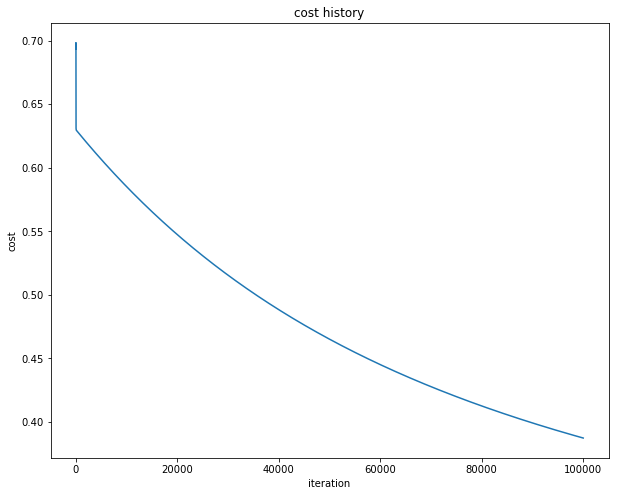

In [14]:
# cost 감소 그래프 
plt.plot(cost_history)
plt.title('cost history')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [19]:
# 구한 theta를 이용해서 잘 구분되는 지 확인해보자. 
# 일단 theta가 정해졌고, x1, x2를 이용해서 식을 구성했을 때 y값이 0.5가 되면 
# 그 위치에서 decision boundary를 형성한다고 생각할 수 있겠다. 
# 그리고 위에 sigmoid 그래프를 잘 보면 y가 0.5일 때는 np.dot(theta, X)가 0일 때이다. 

In [21]:
# theta값 확인
theta 

array([-25.16130062,   0.20623142,   0.20147143])

In [28]:
# x1값 주어지고 구한 theta를 이용해서 x2값 구하기. 
x1 = np.linspace(30, 100, 1000) 
theta0 = theta[0]
theta1 = theta[1]
theta2 = theta[2]
x2 = -(theta0 + theta1 * x1) / theta2 

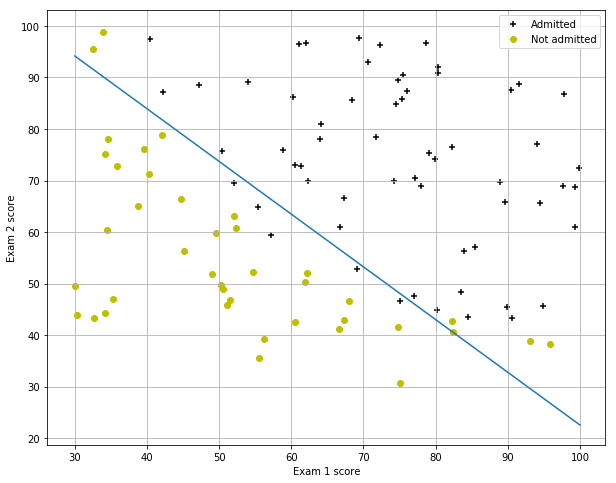

In [30]:
# 그래프 그려보자. 
def plotData2():
    plt.scatter(pos[:,1],pos[:,2], c='k', marker='+', label='Admitted')
    plt.scatter(neg[:,1],neg[:,2], c='y', marker='o',label='Not admitted')
    plt.plot(x1, x2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid()
    
plotData2()

### 아래는 scipy를 활용한 예제이다. 한 번 돌려보기만 하자. 

In [31]:
#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta,myX,myy):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy), maxiter=400, full_output=True)
    return result[0], result[1]


In [32]:
theta, mincost = optimizeTheta(initial_theta,X,y)
#That's pretty cool. Black boxes ftw

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [33]:
#"Call your costFunction function using the optimal parameters of θ. 
#You should see that the cost is about 0.203."
print(computeCost(theta,X,y))

0.20349770159


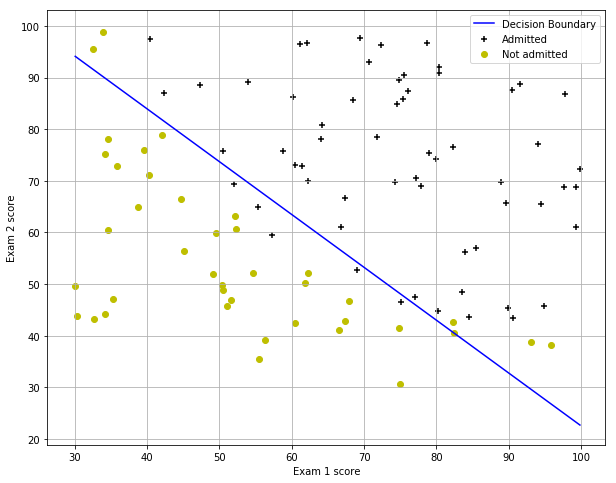

In [34]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [35]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print(h(theta,np.array([1, 45.,85.])))

0.776291590411


In [36]:
# scipy에서 나오는 theta는 rank가 1이라서 2로 바꿔준다. 
theta = theta.reshape([-1, 1])

In [37]:
pred = predict(theta, X) 
correct = np.sum(pred == y) / len(pred)
print('Train accuracy {}%'.format(100 * correct))

Train accuracy 89.0%


# 일단 여기까지 수정함. 
--- 

### 2 Regularized Logistic Regression

#### 2.1 Visualizing the data

In [38]:
datafile = 'data/ex2data2.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [40]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
#Check to make sure I included all entries
#print "Included everything? ",(len(pos)+len(neg) == X.shape[0])

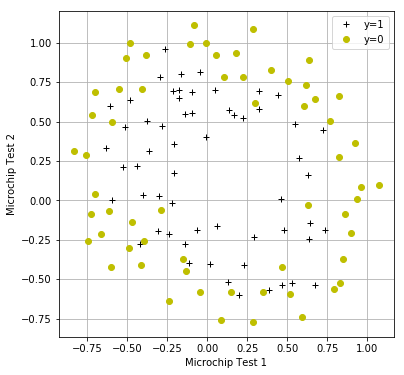

In [41]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

#### 2.2 Feature mapping

In [42]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [43]:
#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

#### 2.3 Cost function and gradient

In [63]:
#Cost function, default lambda (regularization) 0
def computeCost(theta, X, y, reg_lambda=0):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    cost_front = np.dot(y.T, np.log(h(theta, X)))
    cost_back = np.dot((1-y).T, np.log(1 - h(theta, X)))
    cost_reg = reg_lambda * np.sum(theta**2)
    cost_total = (-1/m) * np.sum(cost_front + cost_back) + cost_reg
    
    return cost_total

In [64]:
#Cost function is the same as the one implemented above, as I included the regularization
#toggled off for default function call (lambda = 0)
#I do not need separate implementation of the derivative term of the cost function
#Because the scipy optimization function I'm using only needs the cost function itself
#Let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
#and regularized x values
initial_theta = np.zeros((mappedX.shape[1],1))
computeCost(initial_theta,mappedX,y)

0.69314718055994529

##### 2.3.1 Learning parameters using fminunc

In [65]:
#I noticed that fmin wasn't converging (passing max # of iterations)
#so let's use minimize instead

def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

#### 2.4 Plotting the decision boundary

In [66]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/whikwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by 

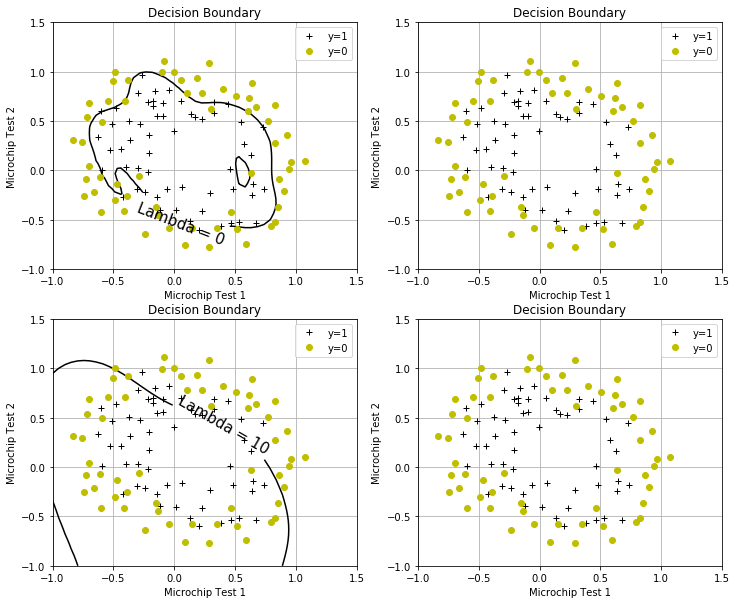

In [67]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)